# Hill Climbing algorithm

In [1707]:
#Import nescessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math
import tqdm

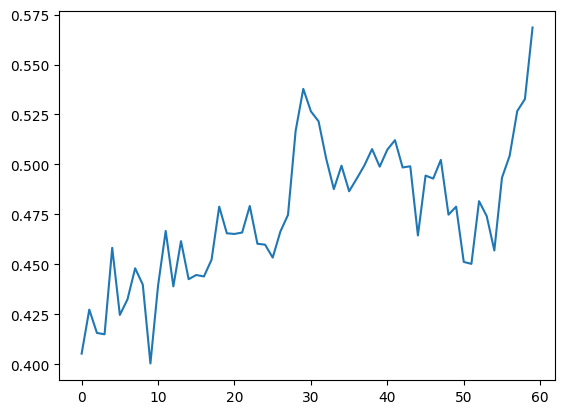

In [1708]:
#Creating random noise
g_length =100
graph = np.random.random((g_length))


#Smoothening it using a kernal
k_length = int(g_length/5)
kernal = np.ones(k_length)/k_length

graph = np.convolve(graph,kernal,mode="same")
graph = graph[k_length:g_length-k_length]
#display the graph
plt.plot(graph)


In [1709]:
#Implementing simple hill climbing
def hill_climb(graph,state):
    while True:
        #Values of current and neighbor
        current = graph[state]
        left = -1
        right = -1

        #Find values of neighbors
        if(state+1<len(graph)):
            right = graph[state+1]
    
        elif(state-1>=0 ):
            left= graph[state-1]
        
        #Get the best neighbor
        if(right>left and right>current):
            state = state+1
            continue
        
        elif(left>right and left>current):
            state = state-1
            continue

        return state

In [1710]:
#Find smallest value
peak = hill_climb(graph,50)
print(peak)

50


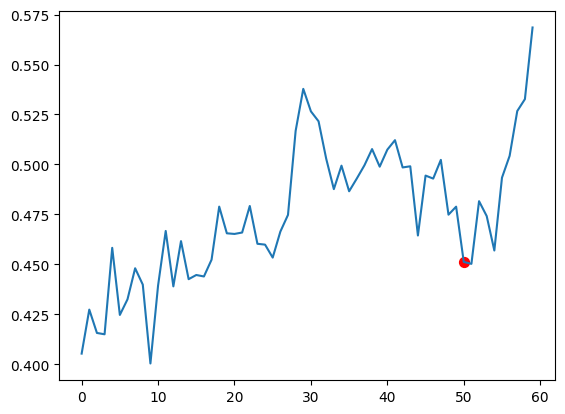

In [1711]:
#Plot the peak and graph
plt.plot(graph)
plt.scatter(peak,graph[peak],color="red",s=50)
plt.show()

# Random Restart Hill Climbing

In [1712]:
epochs = 20

peakx = []
peaky = []

for i in range(0,epochs):
    start= random.randrange(0,len(graph))

    curr= hill_climb(graph,start)
    peakx.append(curr)
    peaky.append(graph[curr])

#Print values
print(peakx)
print(peaky)

#Print the best value
bestx = peaky.index(max(peaky))
besty = peaky[bestx]
print(peakx[bestx]," ",besty)

[43, 29, 59, 34, 59, 59, 59, 29, 22, 38, 1, 38, 32, 2, 8, 59, 15, 59, 18, 45]
[0.4990679467795978, 0.5378172530552, 0.5685413950272227, 0.4993863547749118, 0.5685413950272227, 0.5685413950272227, 0.5685413950272227, 0.5378172530552, 0.47920653648562717, 0.5076858358749855, 0.4273502953018322, 0.5076858358749855, 0.5028631293089382, 0.41566960200226605, 0.4398599653600633, 0.5685413950272227, 0.4446721276102163, 0.5685413950272227, 0.4788934270718118, 0.4944262899469197]
59   0.5685413950272227


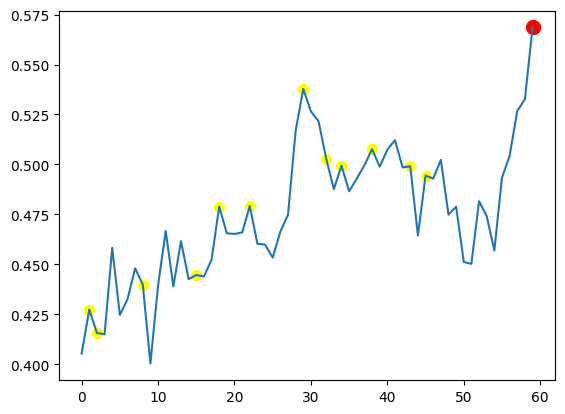

In [1713]:
#Plot the results
plt.plot(graph)
plt.scatter(peakx,peaky,color="yellow",s=50)
plt.scatter(peakx[bestx],besty,color="red",s=100)
plt.show()

# Simulating mTSP 

In [1714]:
#Simulating multi agent hill climbing

#Create nodes
def createNodes(n:int,maxx:float,maxy:float):
    X = []
    Y = []
    nodes = []
    for i in range(0,n):
        x = random.randrange(0,maxx)
        y = random.randrange(0,maxy)
        X.append(x)
        Y.append(y)
        nodes.append((x,y))
    
    return nodes,X,Y


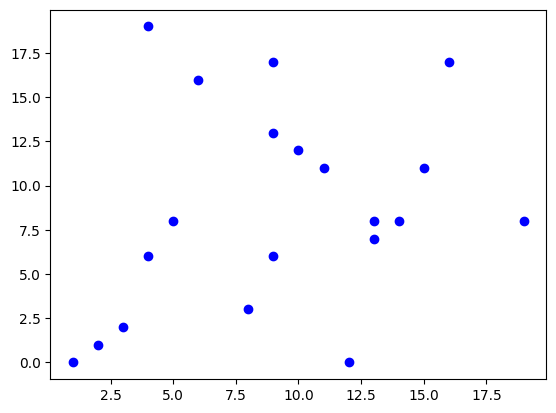

In [1715]:
#Plot the cities
c_count = 20
nodes ,X,Y = createNodes(c_count,20,20)
plt.scatter(X,Y,color="Blue")
plt.show()

In [1716]:
# We attempt to run hill climbing by checking all successor states to the current state

#The cost we wish to minimize
def computeCost(agents:list,graph:list):
    
    #Check total cost of each agent
    cost = 0
    for agent in agents:

  
        #Starting position
        start = agent[0]

        #For each node in the graph
        for i in range(1,len(agent)):
            cost += ((graph[agent[i-1]][0]-graph[agent[i]][0])**2 + (graph[agent[i-1]][1]-graph[agent[i]][1])**2)**0.5
        cost += ((graph[start][0]-graph[agent[len(agent)-1]][0])**2 + (graph[start][1]-graph[agent[len(agent)-1]][1])**2)**0.5
    
    return cost


In [1717]:
#Algorithm to generate successor states
def generateSuccessors(agents):

    result = []

    for i in range(0,len(agents)):
        for j in range(0,len(agents[i])):
            #Swap with remaining possibilites
            for k in range(0,len(agents)):
                for l in range(0,len(agents[k])):
                    
                    s = copy.deepcopy(agents)
                    temp = s[i][j]
                    s[i][j] = s[k][l]
                    s[k][l] = temp

                    #To avoid duplicates
                    if(s not in result):
                        result.append(s)
            
            #If a node is not empty
            if(len(agents[i])<=1):
                continue

            #Add to rest
            for k in range(0,len(agents)):
                if(k!=i):
                    s = copy.deepcopy(agents)
                    val = s[i].pop(j)
                    s[k].append(val)

                    if(s not in result):
                        result.append(s)

            
    return result
            


In [1734]:
# Check the generate successor function
trial_agent_count = 2
trial_city_count = 4
trial = []

for i in range(0,trial_agent_count):
    trial.append([])

for i in range(0,trial_city_count):
    trial[i%trial_agent_count].append(i)

print(trial)
print("#######################")
for g in generateSuccessors(trial):
    print(g)

[[0, 2], [1, 3]]
#######################
[[0, 2], [1, 3]]
[[2, 0], [1, 3]]
[[1, 2], [0, 3]]
[[3, 2], [1, 0]]
[[2], [1, 3, 0]]
[[0, 1], [2, 3]]
[[0, 3], [1, 2]]
[[0], [1, 3, 2]]
[[0, 2], [3, 1]]
[[0, 2, 1], [3]]
[[0, 2, 3], [1]]


In [1731]:
# We consider the initial state to be all agents getting one state except the last one, who gets all the remaining states
a_count = 4
agents = []

for i in range(0,a_count):
    agents.append([])

for i in range(0,c_count):
    agents[i%a_count].append(i)

print(agents)
print(computeCost(agents,nodes))




[[0, 4, 8, 12, 16], [1, 5, 9, 13, 17], [2, 6, 10, 14, 18], [3, 7, 11, 15, 19]]
207.36868799887526


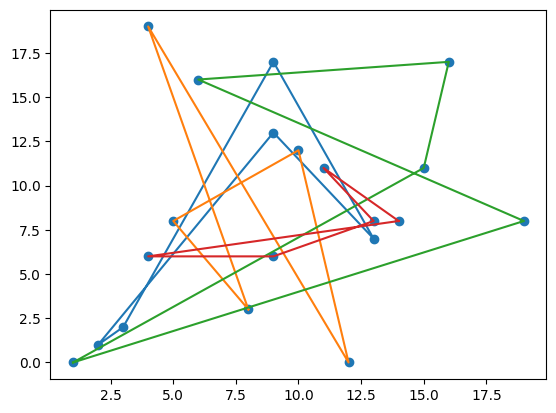

In [1719]:
#Initial initial paths
def plot_paths(agents,X,Y):
    for a in agents:
        x = []
        y = []

        for i in a:
            x.append(X[i])
            y.append(Y[i])
        x.append(X[a[0]])
        y.append(Y[a[0]])
        plt.plot(x,y)

    plt.scatter(X,Y)
    plt.show

plot_paths(agents,X,Y)

In [1720]:
#Simulate hill climbing
def simulate_TSP_hill_climbing(state,graph):

    
    #Generate successors
    change = True
    while change:
        successors = generateSuccessors(state)
        change = False
       
        min = computeCost(state,graph)
        for s in successors:
            cost = computeCost(s,graph)
           
            if(cost<min):
                state = s
                min = cost
                change= True
                
        
    return state,min
       
            


In [1721]:
# We run our simulation
result,cost = simulate_TSP_hill_climbing(agents,nodes)
print("Cost on running once ",cost)

Cost on running once  89.81135089802555


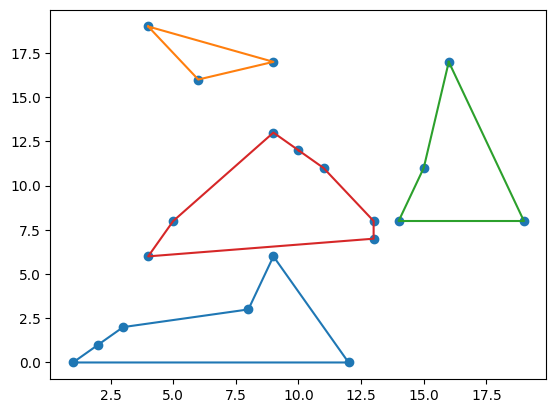

In [1722]:
#Plot final paths
plot_paths(result,X,Y)

# Random Restart Hill Climbing

In [1723]:
#Generating random state
def generate_random(city_count:int,agent_count:int):
    
    while True:
        state = []
        
        for i in range(0,agent_count):
            state.append([])

        for j in range(0,city_count):
        
            a = random.randrange(0,agent_count)
            state[a].append(j)

        valid = True
        for row in state:
            if(len(row)==0):
                valid = False
                break

        if valid :           
            return state


In [1724]:
#See the random initial state
state = generate_random(c_count,a_count)
print(state)

[[1, 4, 5, 6, 8, 13, 14, 16], [7, 15, 19], [2, 3, 9, 18], [0, 10, 11, 12, 17]]


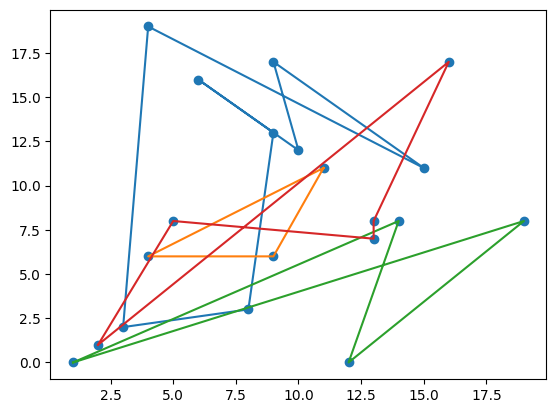

In [1725]:
#See initial graph
plot_paths(state,X,Y)

In [1726]:
#Do Random restart hill climbing
def Restart(agent_count:int,graph,iterations):

    best = generate_random(len(graph),agent_count)
    cost = computeCost(best,graph)

    for i in tqdm.tqdm(range(0,iterations)):
        
        current = generate_random(len(graph),agent_count)

        #Get local best
        local,local_cost = simulate_TSP_hill_climbing(current,graph)

        #Check if it is better
        if(local_cost<cost):
            cost = local_cost
            best = local

    return best,cost



  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:01<00:00, 13.60it/s]


Best cost found  72.87609041140767


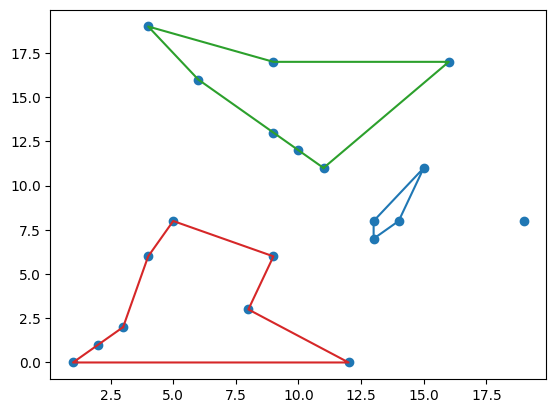

In [1727]:
#Run random restart search
best,cost = Restart(a_count,nodes,20)
print("Best cost found ",cost)

plot_paths(best,X,Y)

# For larger maps

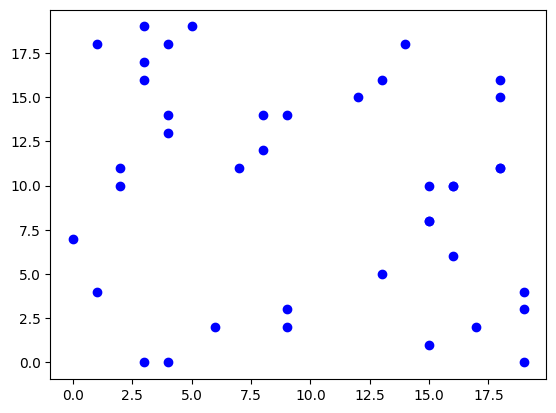

In [1728]:
large , X,Y = createNodes(40,20,20)
plt.scatter(X,Y,color="Blue")
plt.show()

100%|██████████| 30/30 [01:09<00:00,  2.31s/it]

Best cost found  114.70797913111437


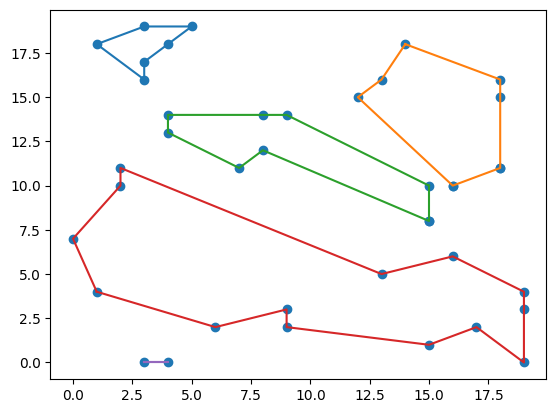

In [1729]:
#Run Random Search 
best,cost = Restart(5,large,30)
print("Best cost found ",cost)

plot_paths(best,X,Y)